Number of rows (genes): 5
Number of columns (samples): 76

First few rows of the dataset:

After cleaning, number of rows: 5

Mean, Median, and Mode values for each gene:
  Gene Name  Mean Expression  Median Expression  Mode Expression
0     FOXO1        90.035760           64.28420         20.49490
1     PROM1        57.453825           16.12530          4.94577
2      PBX1        11.474211            9.21519          6.65555
3     PDGFA        61.689239           47.39270         12.17250
4      IGF1       706.515163          552.25500         24.87030

Top 3 highly expressed genes:
  Gene Name  Mean Expression
4      IGF1       706.515163
0     FOXO1        90.035760
3     PDGFA        61.689239



Enter a gene name for detailed analysis:  IGF1



Expression values for IGF1:
GSM155919     866.2310
GSM155920     487.0510
GSM155921     552.2550
GSM155922     119.2950
GSM155923     507.8530
               ...    
GSM155989     993.6080
GSM155990      54.0963
GSM155991     417.4150
GSM155992    1055.4300
GSM155993     144.4150
Name: 4, Length: 75, dtype: float64


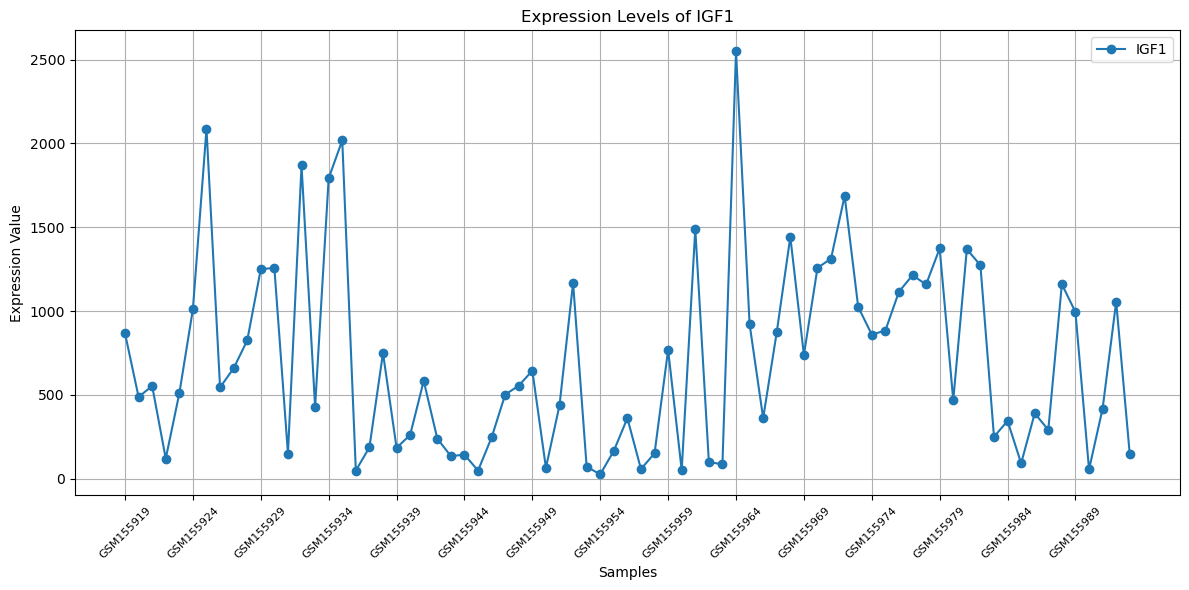

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\miari\Downloads\gene_expression_file.csv")
data

# Display initial dataset information
print(f"Number of rows (genes): {data.shape[0]}")
print(f"Number of columns (samples): {data.shape[1]}\n")
print("First few rows of the dataset:")
data.head(2)

# Remove rows with missing values
clean_data = data.dropna()
print(f"\nAfter cleaning, number of rows: {clean_data.shape[0]}")
clean_data

# Remove unnecessary columns
columns_to_remove = ['Gene Name'] 
final_data = clean_data.drop(columns=columns_to_remove)
final_data

# Calculate statistics
mean_values = np.mean(final_data, axis=1)
median_values = np.median(final_data, axis=1)
mode_values = final_data.mode(axis=1)[0]

# Add calculated statistics back to the dataset
clean_data['Mean Expression'] = mean_values
clean_data['Median Expression'] = median_values
clean_data['Mode Expression'] = mode_values

# Display statistics with gene names
print("\nMean, Median, and Mode values for each gene:")
print(clean_data[['Gene Name', 'Mean Expression', 'Median Expression', 'Mode Expression']])

# Identify top genes
top_genes = clean_data.nlargest(3, 'Mean Expression')[['Gene Name', 'Mean Expression']]
print("\nTop 3 highly expressed genes:")
print(top_genes)

# Analyze specific genes
gene_name = input("\nEnter a gene name for detailed analysis: ")
if gene_name in clean_data['Gene Name'].values:
    gene_data = clean_data.loc[clean_data['Gene Name'] == gene_name].drop(columns=['Gene Name', 'Mean Expression', 'Median Expression', 'Mode Expression']).squeeze()
    print(f"\nExpression values for {gene_name}:")
    print(gene_data)

    # Plot the expression values
    plt.figure(figsize=(12, 6))
    plt.plot(gene_data.index, gene_data.values, marker='o', label=gene_name)
    plt.xticks(ticks=range(0, len(gene_data.index), 5), rotation=45, fontsize=8)  # Show every 5th label
    plt.title(f"Expression Levels of {gene_name}")
    plt.xlabel("Samples")
    plt.ylabel("Expression Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print(f"\nGene '{gene_name}' not found in the dataset.")
